In [92]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("data_mustahik.csv")

print("✅ Data berhasil dimuat")
display(df.head())

✅ Data berhasil dimuat


,id_nama,program_baznas,surat_permohonan,fc_ktp,fc_kk,sktm,foto_pendukung
0,Siti Abdullah,Pendidikan,1,1,1,1,1
1,Ali Yusuf,Kesehatan,1,1,1,0,1
2,Usman Hasan,Pendidikan,1,0,1,1,1
3,Nur Aminah,Dakwah,1,1,1,1,1
4,Aminah Aisyah,Kemanusiaan,1,1,1,1,1


In [93]:
SYARAT_UMUM = [
    'surat_permohonan',
    'fc_ktp',
    'fc_kk',
    'sktm',
    'foto_pendukung'
]

def tentukan_status(row):
    dokumen_kurang = []

    for col in SYARAT_UMUM:
        if int(row[col]) != 1:
            dokumen_kurang.append(col)

    total_syarat = len(SYARAT_UMUM)
    lengkap = total_syarat - len(dokumen_kurang)
    persentase = (lengkap / total_syarat) * 100

    if len(dokumen_kurang) == 0:
        status = "DITERIMA"
    else:
        status = "DITOLAK"
        keterangan = "Dokumen tidak lengkap"

    return pd.Series({
        'Persentase Kelengkapan (%)': round(persentase, 1),
        'Dokumen Kurang': ", ".join(dokumen_kurang),
        'Status': status
    })

# Proses Seleksi
df_hasil = df.copy()
hasil_status = df_hasil.apply(tentukan_status, axis=1)
df_hasil = pd.concat([df_hasil, hasil_status], axis=1)

print("\n===== HASIL SELEKSI MUSTAHIK =====")
display(df_hasil[
    ['id_nama', 'program_baznas',
     'Persentase Kelengkapan (%)',
     'Dokumen Kurang', 'Status']
])

total_diterima = (df_hasil['Status'] == 'DITERIMA').sum()
total_ditolak  = (df_hasil['Status'] == 'DITOLAK').sum()

print(f"\n✅ Total DITERIMA tahun 2024: {total_diterima}")
print(f"❌ Total DITOLAK tahun 2024: {total_ditolak}")


===== HASIL SELEKSI MUSTAHIK =====


,id_nama,program_baznas,Persentase Kelengkapan (%),Dokumen Kurang,Status
0,Siti Abdullah,Pendidikan,100.0,,DITERIMA
1,Ali Yusuf,Kesehatan,80.0,sktm,DITOLAK
2,Usman Hasan,Pendidikan,80.0,fc_ktp,DITOLAK
3,Nur Aminah,Dakwah,100.0,,DITERIMA
4,Aminah Aisyah,Kemanusiaan,100.0,,DITERIMA
...,...,...,...,...,...
995,Ismail Abdullah,Kesehatan,80.0,sktm,DITOLAK
996,Aminah Nabila,Pendidikan,40.0,"surat_permohonan, fc_kk, sktm",DITOLAK
997,Putri Muhammad,Dakwah,100.0,,DITERIMA
998,Usman Nabila,Dakwah,80.0,fc_kk,DITOLAK



✅ Total DITERIMA tahun 2024: 624
❌ Total DITOLAK tahun 2024: 376


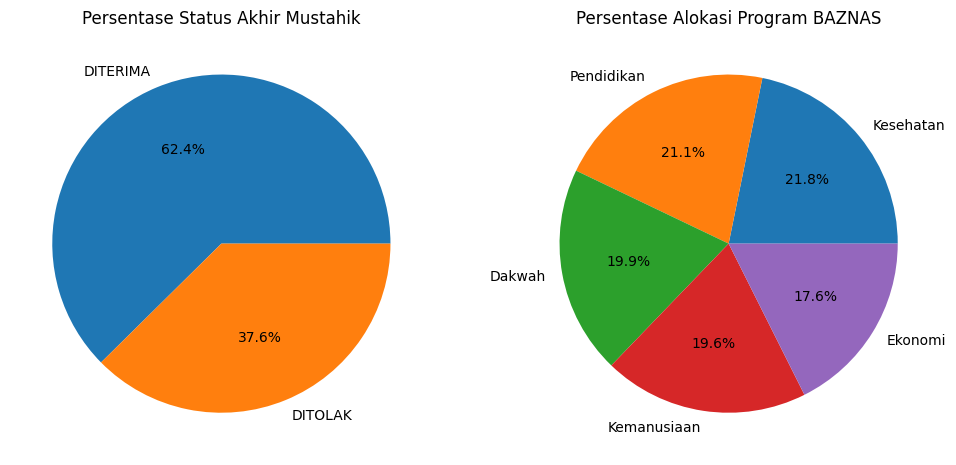

In [94]:
import matplotlib.pyplot as plt

# PIE 1: STATUS MUSTAHIK
total_diterima = (df_hasil['Status'] == 'DITERIMA').sum()
total_ditolak  = (df_hasil['Status'] == 'DITOLAK').sum()

# PIE 2: PROGRAM BAZNAS
jumlah_program = df_hasil['program_baznas'].value_counts()

plt.figure(figsize=(12,6))

# Pie kiri - status
plt.subplot(1,2,1)
plt.pie(
    [total_diterima, total_ditolak],
    labels=['DITERIMA', 'DITOLAK'],
    autopct='%1.1f%%'
)
plt.title("Persentase Status Akhir Mustahik")

# Pie kanan - program baznas
plt.subplot(1,2,2)
plt.pie(
    jumlah_program.values,
    labels=jumlah_program.index,
    autopct='%1.1f%%'
)
plt.title("Persentase Alokasi Program BAZNAS")
plt.show()